In [1]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
def excVWN(n):
  # Constants
    X1 = 0.75*(3.0/(2.0*pi))**(2.0/3.0);
    A  =  0.0310907;
    x0 = -0.10498;
    b  = 3.72744;
    c  = 12.9352;
    Q  = sqrt(4*c-b*b);
    X0 = x0*x0+b*x0+c;

    rs=(4*pi/3*n)**(-1/3); # Added internal conversion to rs
  
    x=sqrt(rs); 
    X=x*x+b*x+c;

    out=-X1/rs+ A*(log(x*x/X)+2*b/Q*np.arctan(Q/(2*x+b))-(b*x0)/X0*(log((x-x0)*(x-x0)/X)+2*(2*x0+b)/Q*np.arctan(Q/(2*x+b)) ) );
    return out


def excVWNp(n):
  # Constants
    Mp = 1800 #1836.152
    X1 = 0.75*(3.0/(2.0*pi))**(2.0/3.0);
    A  =  0.0310907;
    x0 = -0.10498;
    b  = 3.72744;
    c  = 12.9352;
    Q  = sqrt(4*c-b*b);
    X0 = x0*x0+b*x0+c;
 
    rs=1/((4*pi/3*(n / Mp**3 ))**(1/3)); # Added internal conversion to rs
  
    x=sqrt(rs); 
    X=x*x+b*x+c;

    out=-X1/rs+ A*(log(x*x/X)+2*b/Q*np.arctan(Q/(2*x+b))-(b*x0)/X0*(log((x-x0)*(x-x0)/X)+2*(2*x0+b)/Q*np.arctan(Q/(2*x+b)) ) );
    return Mp * out

In [3]:
#crear densidad gaussiana 3d protones y electrones 



S=[300, 300, 300];


a=5.66/0.52917721; # Lattice constant (converted from angstroms to bohrs)

R=a*np.diag(np.ones(3)); # Cubic lattice

# Code fragment to create columns of m1, m2, m3 indices
ms=np.arange(0,np.prod(S)).T; # Count from zero to S1*S2*s3-1 in a column vector
m1=ms%S[0];
m2=floor(ms/S[0])%S[1];
m3=floor(ms/(S[0]*S[1]))%S[2];



# Wrap indices to +/- Fourier convention
n1=m1-(m1>S[0]/2)*S[0];
n2=m2-(m2>S[1]/2)*S[1];
n3=m3-(m3>S[2]/2)*S[2];

# Gather indices into columns of a matrices
N=[n1, n2, n3];
M=[m1, m2, m3];


## Compute Cartesian coords of grid points
r=np.dot((R.T),np.dot(inv(diag(S)),M)); # Scale by 1/S(), mult by real-space vectors (L's)

# Compute reciprocal-space vectors and lengths
G=2*pi*np.dot(inv(R.T),N);
G2=sum( G**2, axis=1);

dr=r-np.dot(np.mat(diag(R)).T,np.ones([prod(S),1]).T)/2;
dr=np.sqrt(np.sum(np.array(dr)**2,0))

#print(shape(dr),shape(M))

sig=1
Sig=1/4
psi1=(1/(2*pi*sig**2)**(3/4))*exp(-dr**2/(4*sig**2))
psi2=(1/(2*pi*Sig**2)**(3/4))*exp(-dr**2/(4*Sig**2))

0.9999997322602728 normalization electron gaussian
0.9999999999999998 normalization proton gaussian


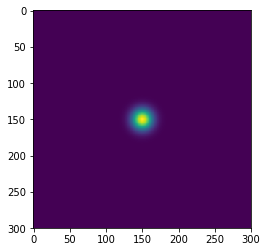

In [4]:
#probar densidad gaussiana
plt.imshow(reshape(psi2,S)[30,:,:])
print(np.sum(psi1*np.conj(psi1))*np.linalg.det(R)/np.prod(S),"normalization electron gaussian")
print(np.sum(psi2*np.conj(psi2))*np.linalg.det(R)/np.prod(S),"normalization proton gaussian")

In [5]:
# crear transformada de fourier inversa 3d en array compacto (necesita inicializar lattice )
Psit1=np.fft.fftn(reshape(psi1,S), axes=(0, 1, 2))
np.sum(psi1*np.conj(psi1))*np.linalg.det(R)/np.prod(S)
# Operador de overlap
O=np.linalg.det(R)
ndens=psi1*psi1
Ndens=psi2*psi2
#poner todo junto
E_ex_e=real( np.trapz((excVWN(ndens))*ndens )*np.linalg.det(R)/np.prod(S));
E_ex_p=real( np.trapz((excVWNp(Ndens))*Ndens )*np.linalg.det(R)/np.prod(S));
print(E_ex_e, E_ex_p)

-0.2316501949474182 -1.4039352424449631


In [6]:
#checking that my implementation of Exc works
print(excVWN(1)) #should be -0.81015
print(excVWN(.1)) #should be -0.39621


print(excVWNp(1)) #should be -1.3573 (for Mp=1800)
print(excVWNp(.1)) #should be -0.63721 (for Mp=1800)

-0.810151378688813
-0.39620590148651225
-1.3573257648989483
-0.6372060569165849


In [7]:
a

10.695849883633501

-0.22945914990681968 nan agreement to 1E-9
0.9682158986536409


/Users/juanmendezvalderrama/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
/Users/juanmendezvalderrama/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in true_divide
/Users/juanmendezvalderrama/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide


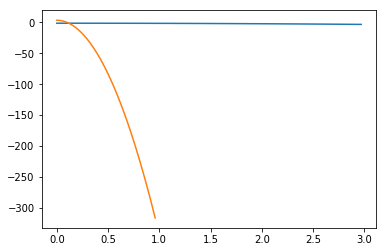

In [8]:
##from mpmath import *
#mp.dps = 15; mp.pretty = True

a,b,c=[2.35,2.4,3.2]   #for epc17-1
#a,b,c=[2.35,2.4,6.6]   #for epc17-2
sig=1
Sig=1/40

N=100;
#U=10.695849883633501 /2
U=3
rr=np.arange(0,U,U/N)
ndens2=((1/(2*pi*sig**2)**(3/4))*exp(-rr**2/(4*sig**2)))**2
Ndens2=((1/(2*pi*Sig**2)**(3/4))*exp(-rr**2/(4*Sig**2)))**2
difr=U/N

plot(rr,log10(ndens2))
plot(rr,log10(Ndens2))
#plot(rr[1:],(1/(2*pi*sig**2)**(3/2))*rr[1:]/rr[1:])


Exc_e= difr*np.trapz((excVWN(ndens2))*ndens2*rr*rr*4*np.pi)
Exc_p= difr*np.trapz((excVWNp(Ndens2))*Ndens2*rr*rr*4*np.pi)
print(Exc_e,Exc_p, "agreement to 1E-9")
Norm1= difr*np.trapz(ndens2*rr*rr*4*np.pi)
Norm2= difr*np.trapz(Ndens2*rr*rr*4*np.pi)
print(Norm1)

In [21]:
def EPC_17(a,b,c,sig,Sig):
    
    lamb=(1/(2*np.pi*(Sig)*(sig)))**3
    alphe=1/(1/Sig**2+1/sig**2)
    
    N=100000;
    U=10000
    u=np.arange(0,U,U/N)

    
    
    out= -4*pi*(U/N)*np.trapz((u**2)*lamb*np.exp(-u**2 /(2*alphe) )/ (a-b*np.sqrt(lamb)*np.exp(-u**2 /(4*alphe) )+c*lamb*np.exp(-u**2 /(2*alphe) )))
    return out

def Energy(a,b,c,sig,Sig):
    M=1836.152
    Te=(3/8)*(1/sig**2)
    Tp=(3/8)*(1/Sig**2) /M
    Vcoul=np.sqrt(2/np.pi)/np.sqrt(sig**2 +Sig**2)
    #abc=np.sqrt(4*a*c-b**2)
    #EPC17pre= (-4*(np.pi**(3/2))*(sig**3)*(Sig**3))/(c*abc*((sig**2+Sig**2)**(3/2)))  
    #EPC17_1=(-1j*b+abc)*polylog( 3/2,   (b-1j*abc)/(4*np.sqrt(2)*a* ((np.pi*sig*Sig)**(3/2))  ) )
    #EPC17_2=(1j*b+abc)*polylog(  3/2,  (b+1j*abc)/(4*np.sqrt(2)*a* ((np.pi*sig*Sig)**(3/2))  ) )
    #SHO=0.5*(0.2*10)*Sig**2
    #EPC17=EPC17pre*(EPC17_1+EPC17_2)
    EPC17=EPC_17(a,b,c,sig,Sig)
    Vautointele=np.sqrt(1/np.pi)/sig
    Vautointprot=np.sqrt(1/np.pi)/Sig
    
    N=100000;
    U=10.695849883633501 /2
    #U=5

    rr=np.arange(0,U,U/N)
    ndens2=((1/(2*pi*sig**2)**(3/4))*exp(-rr**2/(4*sig**2)))**2
    Ndens2=((1/(2*pi*Sig**2)**(3/4))*exp(-rr**2/(4*Sig**2)))**2
    difr=U/N
    ndens2[np.where(ndens2<1E-17)]=1E-17
    Ndens2[np.where(Ndens2<1E-17)]=1E-17

    Exc_e= difr*np.trapz((excVWN(ndens2))*ndens2*rr*rr*4*np.pi)
    Exc_p= difr*np.trapz((excVWNp(Ndens2))*Ndens2*rr*rr*4*np.pi)
    
    print(EPC17)
    return Te+Tp +Exc_e+Exc_p-Vcoul +0.5*Vautointele+0.5*Vautointprot +real(EPC17)
    #return Exc_p

In [22]:

def gradEnergy(a,b,c,sig,Sig,h):
    Grad1=(Energy(a,b,c,sig+h,Sig)-Energy(a,b,c,sig-h,Sig))/(2*h)
    Grad2=(Energy(a,b,c,sig,Sig+h)-Energy(a,b,c,sig,Sig-h))/(2*h)
    return np.array([real(Grad1),real(Grad2)])

'''

def gradEnergy(a,b,c,sig,Sig,h):
    Grad1=(-Energy(a,b,c,sig+2*h,Sig)+8*Energy(a,b,c,sig+h,Sig)-8*Energy(a,b,c,sig-h,Sig)+Energy(a,b,c,sig-2*h,Sig))/(12*h)
    Grad2=(-Energy(a,b,c,sig,Sig+2*h)+8*Energy(a,b,c,sig,Sig+h)-8*Energy(a,b,c,sig,Sig-h)+Energy(a,b,c,sig,Sig-2*h))/(12*h)
    return np.array([Grad1,Grad2])
'''

'\n\ndef gradEnergy(a,b,c,sig,Sig,h):\n    Grad1=(-Energy(a,b,c,sig+2*h,Sig)+8*Energy(a,b,c,sig+h,Sig)-8*Energy(a,b,c,sig-h,Sig)+Energy(a,b,c,sig-2*h,Sig))/(12*h)\n    Grad2=(-Energy(a,b,c,sig,Sig+2*h)+8*Energy(a,b,c,sig,Sig+h)-8*Energy(a,b,c,sig,Sig-h)+Energy(a,b,c,sig,Sig-2*h))/(12*h)\n    return np.array([Grad1,Grad2])\n'

In [29]:
sig=1.1
Sig=1/60
Energy(a,b,c,sig,Sig) #for Sig=1/2 and sig=1 should be -0.43294 For Sig=1/4 sig=1 should be -0.62090, -0.74004


-5.323243643648938e-08


-1.7127342862508528

For $\sigma$=1 and $\Sigma$=1/6  



For python radial integration

T=0.3823523324866351
EHart= 1.187635059721722
EPC=-0.029115955315422756
Exce= -0.23165018668984175
Excp=-2.088209566937999
Tot=-0.7789883167349063

For octave

S=[120,120,120]


T=0.38250
EHart=1.1876
EPC=-0.029118
Exce=-0.23165
Excp=-2.0882
Tot=-0.77886

S=[80,80,80]

For octave
T=0.38242
EHart= 1.1543
EPC=-0.029479
Exce=-0.23165
Excp=-2.0524
Tot=-0.77674

In [12]:

#a,b,c=[2.35,2.4,3.2]   #for epc17-1
a,b,c=[2.35,2.4,6.6]   #for epc17-2
presSig=np.array([1,1/70])

E0= Energy(a,b,c,presSig[0],presSig[1])
print(presSig,E0)

h=1E-5
grad1=gradEnergy(a,b,c,presSig[0],presSig[1],h)

step=0.0001
postsSig=presSig-step*grad1


E1= Energy(a,b,c, real(postsSig[0]), real(postsSig[1]))
delta=abs(E1-E0)
E0=real(E1)

print(postsSig,E1,delta, grad1)


[1.         0.01428571] -1.5698332399362454
[1.00000239 0.02333687] -1.7583454473559919 0.1885122074197465 [-2.38835748e-02 -9.05115981e+01]


In [15]:

gamma = 1E-4 # Step size multiplier
precision = 1E-6  # Desired precision of result
max_iters = 1000  # Maximum number of iterations

# Derivative function

j=0
for i in range(max_iters):
    presSig = postsSig
    postsSig = presSig - gamma * gradEnergy(a,b,c,presSig[0],presSig[1],h)
    step = np.sqrt(np.sum((postsSig - presSig)**2))
    j=j+1
    print(step,Energy(a,b,c, real(postsSig[0]), real(postsSig[1])),real(postsSig[0]), real(postsSig[1]))
    if abs(step) <= precision:
        break
    
print("Minimum at", postsSig, "With energy",Energy(a, b, c, real(postsSig[0]), real(postsSig[1]))," within" , j, "iterations")
    

5.144320730914428e-06 -1.7733273264958234 1.0000264055367294 0.020623481073818
3.2727571893853317e-06 -1.7733274210460586 1.0000288120296676 0.020621263027073948
2.6379650943573465e-06 -1.7733274876611789 1.00003121832996 0.020620182018867665
2.4630582106164913e-06 -1.7733275476264827 1.0000336244360333 0.02061965541720317
2.419542409410165e-06 -1.7733276060032743 1.0000360303471492 0.020619398946593974
2.408955720517129e-06 -1.7733276639944957 1.000038436062959 0.02061927405021518
2.4062891006868556e-06 -1.7733277218863572 1.0000408415832998 0.020619213229769832
2.4055071735005556e-06 -1.7733277797471005 1.0000432469081235 0.020619183611296603
2.4051725207476554e-06 -1.773327837593099 1.000045652037386 0.020619169186123325
2.4049439698725174e-06 -1.7733278954283391 1.0000480569710892 0.02061916215896225
2.4047405897830584e-06 -1.7733279532538173 1.00005046170924 0.020619158734039682
2.4045431999976012e-06 -1.773328011069781 1.0000528662518595 0.02061915706315625
2.404347242390921e-06 

2.3868261667198433e-06 -1.773333233167656 1.000270863510411 0.02061915490731297
2.3866323373227467e-06 -1.7733332901254772 1.0002732501427483 0.02061915490104243
2.3864385245791564e-06 -1.773333347074062 1.0002756365812728 0.020619154894756346
2.3862447129458102e-06 -1.773333404013387 1.0002780228259858 0.02061915488844695
2.38605093683943e-06 -1.7733334609434626 1.0002804088769226 0.02061915488217863
2.3858571696150927e-06 -1.7733335178643042 1.0002827947340922 0.02061915487585369
2.385663427925738e-06 -1.773333574775885 1.0002851803975201 0.020619154869527638
2.385469695118094e-06 -1.7733336316782335 1.0002875658672152 0.020619154863228233
2.3852759989478305e-06 -1.7733336885713427 1.0002899511432142 0.0206191548569477
2.385082295006141e-06 -1.773333745455208 1.0002923362255092 0.020619154850634973
2.384888633252692e-06 -1.7733338023298277 1.0002947211141424 0.020619154844378866
2.38469499037338e-06 -1.7733338591952257 1.0002971058091328 0.020619154838048374
2.384501355265459e-06 -1.

2.3671494309234198e-06 -1.773338995494459 1.0005133048081973 0.020619154267254962
2.3669574655908636e-06 -1.7733390515170664 1.000515671765663 0.020619154261033272
2.3667655180219166e-06 -1.7733391075305904 1.000518038531181 0.020619154254810472
2.366573588216629e-06 -1.773339163535023 1.0005204051047691 0.020619154248552145
2.3663816672930522e-06 -1.7733392195303666 1.0005227714864364 0.020619154242286046
2.3661897641330647e-06 -1.7733392755166422 1.0005251376762005 0.020619154236004404
2.3659978887285083e-06 -1.7733393314938297 1.0005275036740893 0.02061915422976162
2.3658060299772723e-06 -1.7733393874619419 1.0005298694801192 0.020619154223567686
2.3656141889899258e-06 -1.7733394434209813 1.0005322350943082 0.020619154217300477
2.3654223746475545e-06 -1.7733394993709335 1.0005346005166829 0.020619154211103212
2.3652305780691e-06 -1.7733395553118343 1.000536965747261 0.020619154204843775
2.365038781490499e-06 -1.7733396112436446 1.0005393307860424 0.020619154198577676
2.3648470126673

2.347852229309063e-06 -1.7733446081584547 1.0007514011898169 0.020619153639287284
2.3476620769705596e-06 -1.7733446632713876 1.0007537488518938 0.020619153633122216
2.347471966820759e-06 -1.773344718375412 1.0007560963238606 0.020619153626940494
2.3472818666629194e-06 -1.773344773470495 1.0007584436057273 0.020619153620759882
2.347091756513017e-06 -1.7733448285566635 1.0007607906974838 0.020619153614601475
2.3469017007642767e-06 -1.7733448836339103 1.0007631375991846 0.020619153608376455
2.3467116627789117e-06 -1.7733449387022442 1.0007654843108473 0.020619153602158095
2.346521615911622e-06 -1.773344993761641 1.0007678308324632 0.02061915359599969
2.346331603461474e-06 -1.7733450488121367 1.0007701771640667 0.020619153589814636
2.346141609884954e-06 -1.7733451038537076 1.0007725233056766 0.02061915358366511
2.345951624080244e-06 -1.7733451588863658 1.0007748692573006 0.020619153577456743
2.34576167491273e-06 -1.7733452139101216 1.0007772150189755 0.020619153571251707
2.3455717257451394

2.328738498710582e-06 -1.7733501297485168 1.0009875579299645 0.02061915301716937
2.3285501837913916e-06 -1.7733501839677785 1.0009898864801483 0.02061915301103317
2.3283618488881116e-06 -1.7733502381782835 1.0009922148419972 0.02061915300491695
2.328173560614409e-06 -1.7733502923800126 1.0009945430155578 0.02061915299874078
2.327985271230246e-06 -1.7733503465729747 1.000996871000829 0.020619152992594585
2.3277970173733082e-06 -1.7733504007571692 1.0009991987978464 0.02061915298644506
2.3276087735081646e-06 -1.773350454932608 1.0010015264066199 0.02061915298037325
2.327420536304682e-06 -1.7733505090992803 1.0010038538271562 0.02061915297425592
2.3272323279669025e-06 -1.7733505632571898 1.0010061810594841 0.02061915296812971
2.32704414516427e-06 -1.7733506174063491 1.0010085081036293 0.020619152961987956
2.3268559623614944e-06 -1.7733506715467418 1.0010108349595916 0.02061915295588506
2.326667807314388e-06 -1.7733507256783951 1.001013161627399 0.020619152949785495
2.326479660039024e-06 -

2.3096195556150994e-06 -1.7733556152052736 1.001224103069537 0.020619152394572952
2.309433033706071e-06 -1.7733556685379264 1.0012264125025707 0.020619152388515576
2.30924651290733e-06 -1.773355721861958 1.0012287217490836 0.020619152382433774
2.3090600076517113e-06 -1.7733557751773938 1.0012310308090913 0.020619152376327547
2.308873537923013e-06 -1.7733558284842121 1.0012333396826292 0.020619152370279052
2.308687079296822e-06 -1.7733558817824162 1.0012356483697085 0.020619152364182818
2.308500627331777e-06 -1.7733559350720165 1.0012379568703358 0.020619152358112118
2.3083141931304407e-06 -1.773355988353012 1.001240265184529 0.020619152352013663
2.308127795566365e-06 -1.7733560416253977 1.0012425733123245 0.0206191523459252
2.3079413891202927e-06 -1.7733560948891862 1.0012448812537136 0.020619152339927775
2.30775502597338e-06 -1.773356148144369 1.0012471890087395 0.020619152333844863
2.3075686728181466e-06 -1.7733562013909479 1.0012494965774124 0.02061915232780192
2.307382328544904e-06

2.2906833463478174e-06 -1.7733610110220503 1.0014587075055472 0.020619151777723048
2.2904985819219104e-06 -1.7733610634837627 1.0014609980041291 0.0206191517716579
2.290313861904661e-06 -1.7733611159370284 1.001463288317991 0.020619151765664916
2.290129141887572e-06 -1.7733611683818264 1.001465578447133 0.020619151759683034
2.2899444318626508e-06 -1.7733612208181646 1.0014678683915648 0.020619151753651192
2.289759755144231e-06 -1.7733612732460462 1.00147015815132 0.020619151747641555
2.289575089528132e-06 -1.773361325665474 1.0014724477264094 0.020619151741619705
2.2893904405652557e-06 -1.773361378076449 1.00147473711685 0.020619151735632273
2.289205809366225e-06 -1.7733614304789709 1.0014770263226593 0.020619151729573786
2.2890211959305054e-06 -1.7733614828730413 1.0014793153438553 0.020619151723541944
2.2888366002583927e-06 -1.7733615352586534 1.0014816041804555 0.020619151717522315
2.288652023460071e-06 -1.773361587635819 1.001483892832479 0.020619151711514898
2.288467454433352e-06 

2.2719276837691897e-06 -1.7733663187824944 1.001691389764259 0.020619151166554155
2.271744704581795e-06 -1.7733663703886549 1.0016936615089636 0.020619151160572273
2.2715617154024335e-06 -1.7733664219865017 1.001695933070679 0.02061915115458928
2.271378753978436e-06 -1.7733664735760373 1.001698204449433 0.020619151148686225
2.271195819200206e-06 -1.7733665251572612 1.001700475645252 0.020619151142704344
2.271012901075113e-06 -1.7733665767301825 1.0017027466581532 0.020619151136723572
2.2708299840600735e-06 -1.7733666282947989 1.0017050174881372 0.020619151130808304
2.270647101462245e-06 -1.7733666798510974 1.0017072881352387 0.020619151124845296
2.270464212202985e-06 -1.7733667313991073 1.0017095585994509 0.020619151118870076
2.270281374014005e-06 -1.773366782938807 1.0017118288808249 0.02061915111287487
2.2700985180613307e-06 -1.773366834470192 1.001714098979343 0.020619151106907423
2.2699157076278034e-06 -1.7733668859932963 1.0017163688950506 0.02061915110096662
2.2697329060761684e-0

2.253350446242897e-06 -1.7733715400393792 1.0019221681528891 0.020619150561081816
2.2531691890115385e-06 -1.7733715908050613 1.0019244213220782 0.020619150555159886
2.252987949543696e-06 -1.7733716415625684 1.0019266743100277 0.020619150549224634
2.2528067289495054e-06 -1.7733716923119065 1.0019289271167566 0.02061915054332935
2.2526255327804283e-06 -1.7733717430530815 1.0019311797422894 0.020619150537395207
2.2524443477132757e-06 -1.7733717937861027 1.001933432186637 0.02061915053153878
2.2522631881816914e-06 -1.773371844510954 1.0019356844498253 0.020619150525592427
2.2520820297599757e-06 -1.7733718952276423 1.001937936531855 0.02061915051969159
2.251900896873549e-06 -1.77337194593618 1.001940188432752 0.020619150513775213
2.251719771758521e-06 -1.7733719966365598 1.0019424401525237 0.020619150507905463
2.2515386843912535e-06 -1.7733720473287926 1.001944691691208 0.02061915050201462
2.2513575959139034e-06 -1.7733720980128633 1.001946943048804 0.020619150496049392
2.2511765263098746e-

2.2349495387784795e-06 -1.7733766763153014 1.002151060762181 0.020619149961032916
2.2347700123846913e-06 -1.7733767262552638 1.0021532955321935 0.02061914995518537
2.2345904871011434e-06 -1.7733767761872057 1.0021555301226805 0.0206191499493456
2.2344109795810517e-06 -1.7733768261111191 1.0021577645336601 0.020619149943556896
2.234231498706651e-06 -1.773376876027025 1.0021599987651588 0.020619149937689367
2.234052035595584e-06 -1.7733769259349015 1.0021622328171944 0.02061914993183294
2.233872581366465e-06 -1.773376975834767 1.0021644666897758 0.020619149925925444
2.2336931437902886e-06 -1.7733770257266108 1.0021667003829196 0.020619149920120088
2.233513733970104e-06 -1.77337707561044 1.0021689338966535 0.02061914991425811
2.2333343330314217e-06 -1.77337712548626 1.0021711672309865 0.020619149908447203
2.2331549320930386e-06 -1.7733771753540692 1.0021734003859186 0.020619149902573013
2.2329755655713337e-06 -1.7733772252138655 1.0021756333614842 0.020619149896725468
2.232796217923578e-0

In [14]:
#Minimum at [0.907835159632385 0.13280468946499] With energy -0.416377344520392  within 60 iterations

In [103]:
%pylab inline
a=2.35; b=2.4; c=3.2;
sig=1
Sig=1/2 *1E-5
pre=1/(2*pi*sig*Sig)**3
al=0.5*(1/sig**2+1/Sig**2)

N=10000
U=1000
u=np.arange(0,U,U/N)


out=-4*np.pi*pre*al**(-1.5)*sum( (u**2 *exp(-u**2))/(a-b*sqrt(pre*exp(-u**2))+c*pre*exp(-u**2)) )*U/N;
print(out,Energy(a,b,c,sig,Sig))

Populating the interactive namespace from numpy and matplotlib


NameError: name 'Energy' is not defined

Populating the interactive namespace from numpy and matplotlib


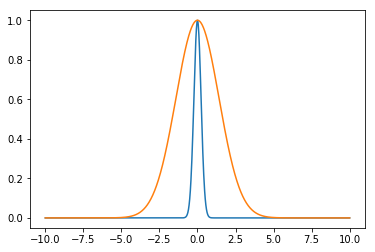

In [16]:
%pylab inline
cx=np.linspace(-10,10,1000)
plot(cx,np.exp(-0.5*cx**2 /(2*(1/6)**2) ))
plot(cx,np.exp(-0.5*cx**2 /(2*(1)**2) ))

In [8]:
#do not erase, converged calculation for the epc functional 

print("Minimum at", postsSig, "With energy",Energy(a, b, c, real(postsSig[0]), real(postsSig[1]))," within" , j, "iterations")
    

Minimum at [0.960089147599263 0.185027812603674] With energy -0.427957172507869  within 10000 iterations


In [ ]:
 ssig=sum(nele.*dr.*dr)*det(gbl_R)/prod(gbl_S)
ssig =  6.043304402648485
octave:38> sSig=sum(Npro.*dr.*dr)*det(gbl_R)/prod(gbl_S)
sSig =    6.303874680199510e-01


sSig=sum(Npro.*dr.*dr)*det(gbl_R)/prod(gbl_S)
sSig =  1.261719557959719
octave:49> sSig=sum(nele.*dr.*dr)*det(gbl_R)/prod(gbl_S)
sSig =  6.116323678266423